############## Simple MOving average, Exponential MOving avearge , Cumulative , rolling(window and min_periods)


Types of Moving Averages:

    Simple Moving Averages (SMA)
    
    Cumulative Moving Averages (CMA)
    
    Exponential Moving Averages (EMA)
    
    Weighted Moving Average (WMA)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

In [320]:
df = pd.read_csv('AirPassengers.csv')

In [321]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [322]:
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

In [323]:
df.shape

(144, 3)

In [324]:
df['MA_3_floor'] = df.iloc[:,1].rolling(window=3).mean().apply(np.floor)

In [325]:
df['MA_3_ceil'] = df.iloc[:,1].rolling(window=3).mean().apply(np.ceil)

In [326]:
df.head()

,Month,Passengers,pandas_SMA_3,MA_3_floor,MA_3_ceil
0,1949-01,112,NaN,NaN,NaN
1,1949-02,118,NaN,NaN,NaN
2,1949-03,132,120.666667,120.0,121.0
3,1949-04,129,126.333333,126.0,127.0
4,1949-05,121,127.333333,127.0,128.0


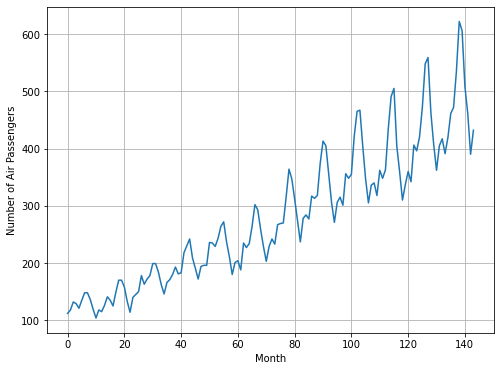

In [86]:
plt.figure(figsize=(8,6))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df['Passengers'])
plt.grid()

<AxesSubplot:>

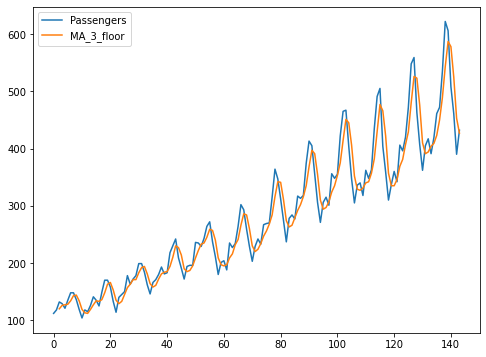

In [87]:
df[['Passengers','MA_3_floor']].plot(figsize=(8,6))

<AxesSubplot:>

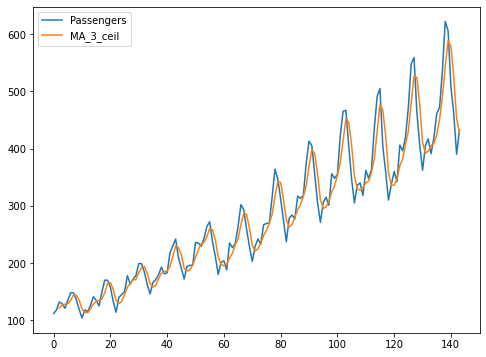

In [88]:
df[['Passengers','MA_3_ceil']].plot(figsize=(8,6))

In [342]:
X = df['Passengers'].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    yhat = np.floor(np.mean([history[i] for i in range(length-window,length)]))
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=120.000000, expected=129.000000
predicted=126.000000, expected=121.000000
predicted=127.000000, expected=135.000000
predicted=128.000000, expected=148.000000
predicted=134.000000, expected=148.000000
predicted=143.000000, expected=136.000000
predicted=144.000000, expected=119.000000
predicted=134.000000, expected=104.000000
predicted=119.000000, expected=118.000000
predicted=113.000000, expected=115.000000
predicted=112.000000, expected=126.000000
predicted=119.000000, expected=141.000000
predicted=127.000000, expected=135.000000
predicted=134.000000, expected=125.000000
predicted=133.000000, expected=149.000000
predicted=136.000000, expected=170.000000
predicted=148.000000, expected=170.000000
predicted=163.000000, expected=158.000000
predicted=166.000000, expected=133.000000
predicted=153.000000, expected=114.000000
predicted=135.000000, expected=140.000000
predicted=129.000000, expected=145.000000
predicted=133.000000, expected=150.000000
predicted=145.000000, expected=178

In [343]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 2342.929


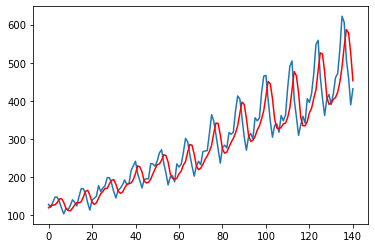

In [344]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [345]:
df['MA_3_floor_check'] = df.iloc[:,1].rolling(window=3).mean().apply(np.floor)

In [355]:
df.tail()

,Month,Passengers,pandas_SMA_3,MA_3_floor,MA_3_ceil,EWM_method1,MA_3_floor_check
139,1960-08,606,587.666667,587.0,588.0,512.0,587.0
140,1960-09,508,578.666667,578.0,579.0,511.0,578.0
141,1960-10,461,525.000000,525.0,525.0,501.0,525.0
142,1960-11,390,453.000000,453.0,453.0,479.0,453.0
143,1960-12,432,427.666667,427.0,428.0,469.0,427.0


MSE:  790.0140845070423
r2: 0.9439820814893292


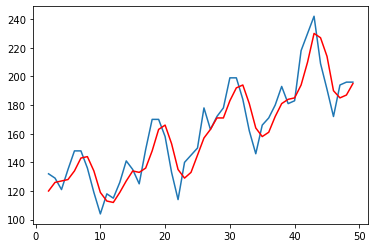

In [353]:
df.head()
def mse(actual, pred): 
    actual = actual[2:,].to_numpy()
    pred = pred[2:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['MA_3_floor_check']))

r2 = r2_score(df['Passengers'][2:],df['MA_3_floor_check'][2:])
print("r2:" , r2)
plt.plot(df['Passengers'][2:50])
plt.plot(df['MA_3_floor_check'][2:50], color='red')
plt.show()

MSE:  284.4755244755245
r2: 0.9799558680674069


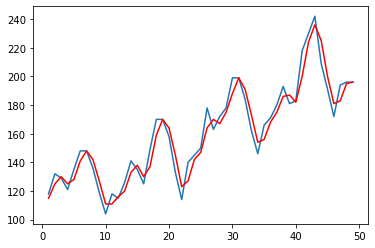

In [356]:
df['MA_2_floor_check1'] = df.iloc[:,1].rolling(window=2).mean().apply(np.floor)
df.head()
def mse(actual, pred): 
    actual = actual[1:,].to_numpy()
    pred = pred[1:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['MA_2_floor_check1']))

r2 = r2_score(df['Passengers'][1:],df['MA_2_floor_check1'][1:])
print("r2:" , r2)
plt.plot(df['Passengers'][1:50])
plt.plot(df['MA_2_floor_check1'][1:50], color='red')
plt.show()

In [359]:
df['MA_2_floor_check12'] = df['Passengers'][48:60].rolling(window=2).mean().apply(np.floor)

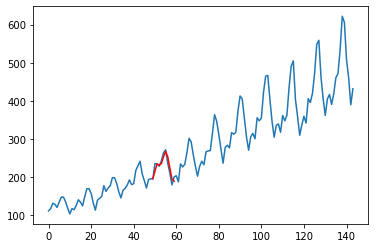

In [361]:
plt.plot(df['Passengers'])
plt.plot(df['MA_2_floor_check1'][49:60], color='red')
plt.show()

https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

In [92]:
df.head()

,Month,Passengers,pandas_SMA_3,MA_3_floor,MA_3_ceil
0,1949-01,112,NaN,NaN,NaN
1,1949-02,118,NaN,NaN,NaN
2,1949-03,132,120.666667,120.0,121.0
3,1949-04,129,126.333333,126.0,127.0
4,1949-05,121,127.333333,127.0,128.0


In [93]:
df['MA_min'] = df['Passengers'].rolling(window=3,min_periods=1).mean()            ############### min_period is used

In [94]:
def mse(actual, pred): 
    actual = actual[2:,].to_numpy()
    pred = pred[2:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['MA_3_floor'])

790.0140845070423

In [95]:
df.head()

,Month,Passengers,pandas_SMA_3,MA_3_floor,MA_3_ceil,MA_min
0,1949-01,112,NaN,NaN,NaN,112.000000
1,1949-02,118,NaN,NaN,NaN,115.000000
2,1949-03,132,120.666667,120.0,121.0,120.666667
3,1949-04,129,126.333333,126.0,127.0,126.333333
4,1949-05,121,127.333333,127.0,128.0,127.333333


In [96]:
df['MA_min_floor'] = df['Passengers'].rolling(window=3,min_periods=1).mean().apply(np.floor)

In [97]:
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['MA_min_floor'])

779.1041666666666

In [98]:
def mse(actual, pred): 
    actual = actual[2:,].to_numpy()
    pred = pred[2:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['MA_3_ceil'])

788.4366197183099

In [99]:
df['MA_min_4'] = df['Passengers'].rolling(window=4,min_periods=1).mean().apply(np.floor)   

In [100]:
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['MA_min_4'])

1289.6944444444443

In [101]:
df['MA_min_2'] = df['Passengers'].rolling(window=2,min_periods=1).mean().apply(np.floor) 

In [102]:
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['MA_min_2'])

282.5

############ rolling window =2 works better than 3,4

In [103]:
df['MA_min_1'] = df['Passengers'].rolling(window=1,min_periods=1).mean().apply(np.floor) 

In [104]:
df.head(10)         ################# no use of window =1 as it is output is given

,Month,Passengers,pandas_SMA_3,MA_3_floor,MA_3_ceil,MA_min,MA_min_floor,MA_min_4,MA_min_2,MA_min_1
0,1949-01,112,NaN,NaN,NaN,112.000000,112.0,112.0,112.0,112.0
1,1949-02,118,NaN,NaN,NaN,115.000000,115.0,115.0,115.0,118.0
2,1949-03,132,120.666667,120.0,121.0,120.666667,120.0,120.0,125.0,132.0
3,1949-04,129,126.333333,126.0,127.0,126.333333,126.0,122.0,130.0,129.0
4,1949-05,121,127.333333,127.0,128.0,127.333333,127.0,125.0,125.0,121.0
5,1949-06,135,128.333333,128.0,129.0,128.333333,128.0,129.0,128.0,135.0
6,1949-07,148,134.666667,134.0,135.0,134.666667,134.0,133.0,141.0,148.0
7,1949-08,148,143.666667,143.0,144.0,143.666667,143.0,138.0,148.0,148.0
8,1949-09,136,144.000000,144.0,144.0,144.000000,144.0,141.0,142.0,136.0
9,1949-10,119,134.333333,134.0,135.0,134.333333,134.0,137.0,127.0,119.0


In [105]:
df['MA_min_CUM'] = df['Passengers'].expanding().mean().apply(np.floor) 

In [106]:
df.head()

,Month,Passengers,pandas_SMA_3,MA_3_floor,MA_3_ceil,MA_min,MA_min_floor,MA_min_4,MA_min_2,MA_min_1,MA_min_CUM
0,1949-01,112,NaN,NaN,NaN,112.000000,112.0,112.0,112.0,112.0,112.0
1,1949-02,118,NaN,NaN,NaN,115.000000,115.0,115.0,115.0,118.0,115.0
2,1949-03,132,120.666667,120.0,121.0,120.666667,120.0,120.0,125.0,132.0,120.0
3,1949-04,129,126.333333,126.0,127.0,126.333333,126.0,122.0,130.0,129.0,122.0
4,1949-05,121,127.333333,127.0,128.0,127.333333,127.0,125.0,125.0,121.0,122.0


In [107]:
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['MA_min_CUM'])

14238.645833333334

########## cumulative is not giving good result

In [108]:
df['EWM_method'] = df['Passengers'].ewm(alpha=0.1,adjust=False).mean().apply(np.floor) 

In [109]:
df.head()

,Month,Passengers,pandas_SMA_3,MA_3_floor,MA_3_ceil,MA_min,MA_min_floor,MA_min_4,MA_min_2,MA_min_1,MA_min_CUM,EWM_method
0,1949-01,112,NaN,NaN,NaN,112.000000,112.0,112.0,112.0,112.0,112.0,112.0
1,1949-02,118,NaN,NaN,NaN,115.000000,115.0,115.0,115.0,118.0,115.0,112.0
2,1949-03,132,120.666667,120.0,121.0,120.666667,120.0,120.0,125.0,132.0,120.0,114.0
3,1949-04,129,126.333333,126.0,127.0,126.333333,126.0,122.0,130.0,129.0,122.0,115.0
4,1949-05,121,127.333333,127.0,128.0,127.333333,127.0,125.0,125.0,121.0,122.0,116.0


In [110]:
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['EWM_method'])

2239.027777777778

########## mse is alos high for Exponential moving average method

In [111]:
df['MA_min_4_rolling'] = df['Passengers'].rolling(window=4).mean().apply(np.floor)   

In [112]:
def mse(actual, pred): 
    actual = actual[4:,].to_numpy()
    pred = pred[4:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['MA_min_4_rolling'])

1325.1

In [119]:
weights = np.arange(1,11)
df['Weighted_Moving'] = df['Passengers'].rolling(10).apply(lambda prices: np.floor(np.dot(prices, weights)/weights.sum()), raw=True)


In [120]:
df[['Passengers','Weighted_Moving']]

,Passengers,Weighted_Moving
0,112,NaN
1,118,NaN
2,132,NaN
3,129,NaN
4,121,NaN
...,...,...
139,606,510.0
140,508,517.0
141,461,513.0
142,390,495.0


In [122]:
def mse(actual, pred): 
    actual = actual[10:,].to_numpy()
    pred = pred[10:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['Weighted_Moving'])

1883.365671641791

In [123]:
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [124]:
weights1 = np.arange(11,21)
df['Weighted_Moving_1'] = df['Passengers'].rolling(10).apply(lambda prices: np.floor(np.dot(prices, weights1)/weights1.sum()), raw=True)


In [125]:
df[['Passengers','Weighted_Moving_1']]

,Passengers,Weighted_Moving_1
0,112,NaN
1,118,NaN
2,132,NaN
3,129,NaN
4,121,NaN
...,...,...
139,606,483.0
140,508,495.0
141,461,497.0
142,390,489.0


In [148]:
X = df['Passengers'].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    new = [history[i] for i in range(length-window,length)]
    print("this is MW elements:",new)
    yhat = np.floor(np.mean(new))
    obs = test[t]
    predictions.append(yhat)
    print(history)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

this is MW elements: [112, 118, 132]
[112, 118, 132]
predicted=120.000000, expected=129.000000
this is MW elements: [118, 132, 129]
[112, 118, 132, 129]
predicted=126.000000, expected=121.000000
this is MW elements: [132, 129, 121]
[112, 118, 132, 129, 121]
predicted=127.000000, expected=135.000000
this is MW elements: [129, 121, 135]
[112, 118, 132, 129, 121, 135]
predicted=128.000000, expected=148.000000
this is MW elements: [121, 135, 148]
[112, 118, 132, 129, 121, 135, 148]
predicted=134.000000, expected=148.000000
this is MW elements: [135, 148, 148]
[112, 118, 132, 129, 121, 135, 148, 148]
predicted=143.000000, expected=136.000000
this is MW elements: [148, 148, 136]
[112, 118, 132, 129, 121, 135, 148, 148, 136]
predicted=144.000000, expected=119.000000
this is MW elements: [148, 136, 119]
[112, 118, 132, 129, 121, 135, 148, 148, 136, 119]
predicted=134.000000, expected=104.000000
this is MW elements: [136, 119, 104]
[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104]
predict

In [149]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 2342.929


In [127]:
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [128]:
window = 3
history = [X[i] for i in range(window)]

In [130]:
history,len(X)

([112, 118, 132], 144)

In [131]:
test = [X[i] for i in range(window, len(X))]

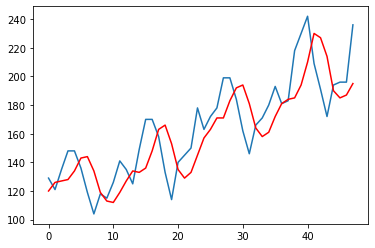

In [155]:
plt.plot(test[0:48])
plt.plot(predictions[0:48], color='red')
plt.show()

In [234]:
X = df['Passengers'].values
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    new = [history[i] for i in range(length-window,length)]
    #print("this is MW elements:",new)
    yhat = np.floor(np.mean(new))
    obs = test[t]
    predictions.append(yhat)
    #print(history)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
from sklearn.metrics import mean_squared_error,r2_score
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r2 = r2_score(test, predictions)
print(r2)

Test MSE: 1778.894
0.8738630594074719


In [235]:
df_new = pd.DataFrame(list(zip(test,predictions)),columns=['actual','predicted'])
print(df_new.head())

   actual  predicted
0     132      115.0
1     129      125.0
2     121      130.0
3     135      125.0
4     148      128.0


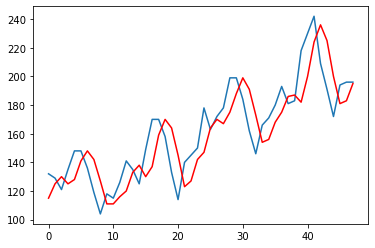

In [237]:
plt.plot(test[0:48])
plt.plot(predictions[0:48], color='red')
plt.show()


this is MW elements: [112, 118, 132]
[112, 118, 132]
predicted=120.000000, expected=129.000000
this is MW elements: [118, 132, 129]
[112, 118, 132, 129]
predicted=126.000000, expected=121.000000
this is MW elements: [132, 129, 121]
[112, 118, 132, 129, 121]
predicted=127.000000, expected=135.000000
this is MW elements: [129, 121, 135]
[112, 118, 132, 129, 121, 135]
predicted=128.000000, expected=148.000000
this is MW elements: [121, 135, 148]
[112, 118, 132, 129, 121, 135, 148]
predicted=134.000000, expected=148.000000
this is MW elements: [135, 148, 148]
[112, 118, 132, 129, 121, 135, 148, 148]
predicted=143.000000, expected=136.000000
this is MW elements: [148, 148, 136]
[112, 118, 132, 129, 121, 135, 148, 148, 136]
predicted=144.000000, expected=119.000000
this is MW elements: [148, 136, 119]
[112, 118, 132, 129, 121, 135, 148, 148, 136, 119]
predicted=134.000000, expected=104.000000
this is MW elements: [136, 119, 104]
[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104]
predict

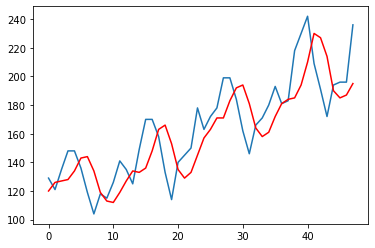

In [347]:
X = df['Passengers'].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    new = [history[i] for i in range(length-window,length)]
    print("this is MW elements:",new)
    yhat = np.floor(np.mean(new))
    obs = test[t]
    predictions.append(yhat)
    print(history)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
from sklearn.metrics import mean_squared_error,r2_score
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r2 = r2_score(test, predictions)
print(r2)

plt.plot(test[0:48])
plt.plot(predictions[0:48], color='red')
plt.show()

Test MSE: 2764.807
0.8020753522189765


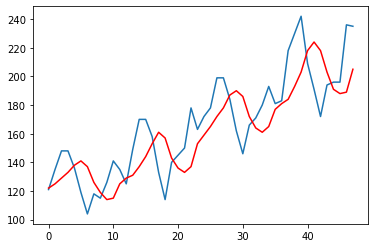

In [232]:
X = df['Passengers'].values
window = 4
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    new = [history[i] for i in range(length-window,length)]
    #print("this is MW elements:",new)
    yhat = np.floor(np.mean(new))
    obs = test[t]
    predictions.append(yhat)
    #print(history)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
from sklearn.metrics import mean_squared_error,r2_score
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r2 = r2_score(test, predictions)
print(r2)


plt.plot(test[0:48])
plt.plot(predictions[0:48], color='red')
plt.show()

Test MSE: 3017.626
0.782514569069943


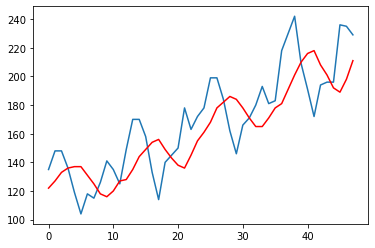

In [233]:
X = df['Passengers'].values
window = 5
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    new = [history[i] for i in range(length-window,length)]
    #print("this is MW elements:",new)
    yhat = np.floor(np.mean(new))
    obs = test[t]
    predictions.append(yhat)
    #print(history)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
from sklearn.metrics import mean_squared_error,r2_score
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r2 = r2_score(test, predictions)
print(r2)


plt.plot(test[0:48])
plt.plot(predictions[0:48], color='red')
plt.show()

################## As the number of window size increases --- MSE increses and R2 score decreses

########### window =2 performs better than all ... r2_score = 87%

########### window =1 gives 91% r2_score

Test MSE: 3269.294
0.7617776175328664


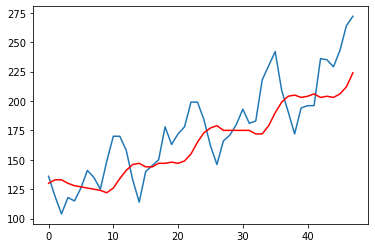

In [240]:
X = df['Passengers'].values
window = 8

history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    new = [history[i] for i in range(length-window,length)]
    #print("this is MW elements:",new)
    yhat = np.floor(np.mean(new))
    obs = test[t]
    predictions.append(yhat)
    #print(history)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
from sklearn.metrics import mean_squared_error,r2_score
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r2 = r2_score(test, predictions)
print(r2)

plt.plot(test[0:48])
plt.plot(predictions[0:48], color='red')
plt.show()

Test MSE: 1136.392
0.9199299012887386
   actual  predicted
0     118      112.0
1     132      118.0
2     129      132.0
3     121      129.0
4     135      121.0


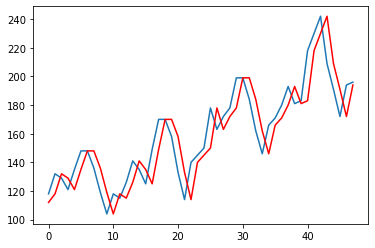

In [247]:
X = df['Passengers'].values
window = 1
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    new = [history[i] for i in range(length-window,length)]
    #print("this is MW elements:",new)
    yhat = np.floor(np.mean(new))
    obs = test[t]
    predictions.append(yhat)
    #print(history)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
from sklearn.metrics import mean_squared_error,r2_score
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r2 = r2_score(test, predictions)
print(r2)

df_new = pd.DataFrame(list(zip(test,predictions)),columns=['actual','predicted'])
print(df_new.head())

plt.plot(test[0:48])
plt.plot(predictions[0:48], color='red')
plt.show()

#### window =1 is naive method ---- which means next op is the previous value So for thi use case it works well

################## As the number of window size increases --- MSE increses and R2 score decreses

########### window =2 performs better than all ... r2_score = 87%

########### window =1 gives 91% r2_score

Test MSE: 1806.397
0.871347024589385
   actual  predicted
0     129      136.0
1     121      136.0
2     135      132.0
3     148      141.0
4     148      152.0


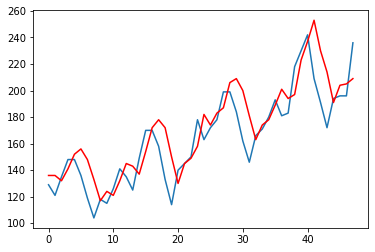

In [264]:
X = df['Passengers'].values
window = 3
weights = [0.15,0.12,0.8]
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    new = [history[i] for i in range(length-window,length)]
    #print("this is MW elements:",new)
    add = np.dot(new,weights)
    yhat = np.floor(np.mean(add))
    obs = test[t]
    predictions.append(yhat)
    #print(history)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
from sklearn.metrics import mean_squared_error,r2_score
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r2 = r2_score(test, predictions)
print(r2)

df_new = pd.DataFrame(list(zip(test,predictions)),columns=['actual','predicted'])
print(df_new.head())

plt.plot(test[0:48])
plt.plot(predictions[0:48], color='red')
plt.show()

Test MSE: 1720.220
0.8774846375810944
   actual  predicted
0     129      121.0
1     121      121.0
2     135      117.0
3     148      125.0
4     148      135.0


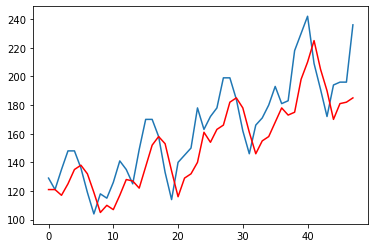

In [275]:
X = df['Passengers'].values
window = 3
weights = [0.15,0.1,0.7]
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    new = [history[i] for i in range(length-window,length)]
    #print("this is MW elements:",new)
    add = np.dot(new,weights)
    yhat = np.floor(np.mean(add))
    obs = test[t]
    predictions.append(yhat)
    #print(history)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
from sklearn.metrics import mean_squared_error,r2_score
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r2 = r2_score(test, predictions)
print(r2)

df_new = pd.DataFrame(list(zip(test,predictions)),columns=['actual','predicted'])
print(df_new.head())

plt.plot(test[0:48])
plt.plot(predictions[0:48], color='red')
plt.show()

In [296]:
list1 = [1,2,3,4,5]
list2 = []
#list2.append([list1[0:x:1] for x in range(0,len(list1))])
cu_list = [sum(list1[0:x:1]) for x in range(0, len(list1)+1)]

In [299]:
list1

[1, 2, 3, 4, 5]

In [300]:
cu_list[1:]

[1, 3, 6, 10, 15]

In [301]:
df['MA_min_CUM1'] = df['Passengers'].expanding().mean().apply(np.floor) 

In [304]:
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['MA_min_CUM1'])

14238.645833333334

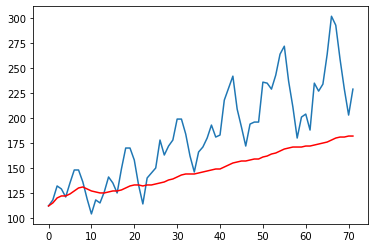

In [306]:
plt.plot(df['Passengers'][0:72])
plt.plot(df['MA_min_CUM1'][0:72], color='red')
plt.show()

MSE:  2239.027777777778
r2: 0.8433366949504535


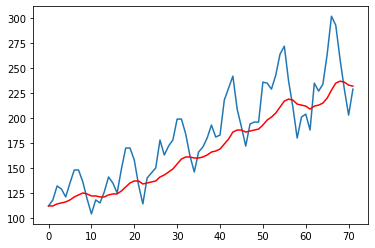

In [310]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.1,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method1']))

r2 = r2_score(df['Passengers'],df['EWM_method1'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method1'][0:72], color='red')
plt.show()

MSE:  1462.8125
r2: 0.8976479688227724


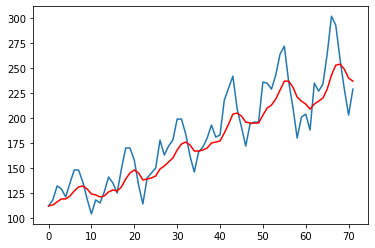

In [311]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.2,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method1']))

r2 = r2_score(df['Passengers'],df['EWM_method1'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method1'][0:72], color='red')
plt.show()

MSE:  1028.0416666666667
r2: 0.9280685988681696


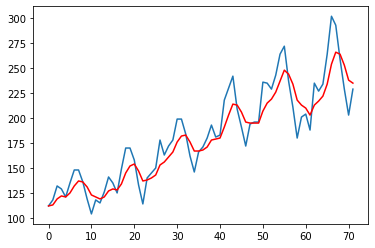

In [312]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.3,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method1']))

r2 = r2_score(df['Passengers'],df['EWM_method1'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method1'][0:72], color='red')
plt.show()

MSE:  691.7361111111111
r2: 0.9515996780100945


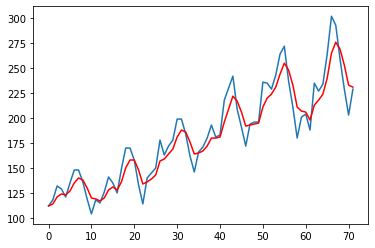

In [313]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.4,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method1']))

r2 = r2_score(df['Passengers'],df['EWM_method1'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method1'][0:72], color='red')
plt.show()

MSE:  253.15277777777777
r2: 0.9822870661799015


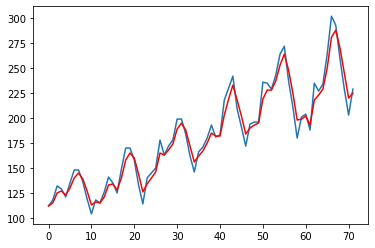

In [314]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.6,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method1']))

r2 = r2_score(df['Passengers'],df['EWM_method1'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method1'][0:72], color='red')
plt.show()

MSE:  129.08333333333334
r2: 0.990968123831459


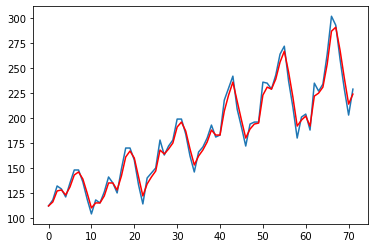

In [315]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.7,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method1']))

r2 = r2_score(df['Passengers'],df['EWM_method1'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method1'][0:72], color='red')
plt.show()

MSE:  53.361111111111114
r2: 0.996266358054709


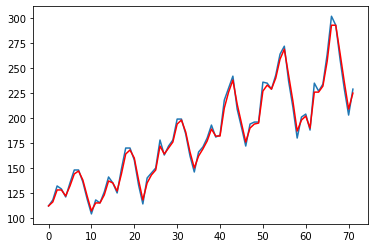

In [317]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.8,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method1']))

r2 = r2_score(df['Passengers'],df['EWM_method1'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method1'][0:72], color='red')
plt.show()

MSE:  12.847222222222221
r2: 0.999101088287508


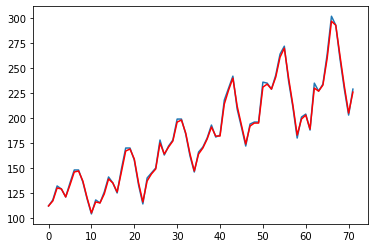

In [318]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.9,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method1']))

r2 = r2_score(df['Passengers'],df['EWM_method1'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method1'][0:72], color='red')
plt.show()

MSE:  1462.8125
r2: 0.8976479688227724


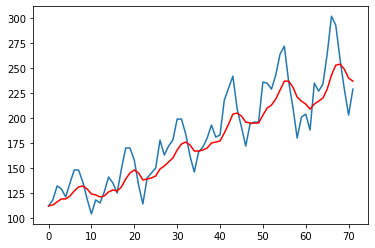

In [329]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.2,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method1']))

r2 = r2_score(df['Passengers'],df['EWM_method1'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method1'][0:72], color='red')
plt.show()

### NOTE:
### 1.rolling method with window =3 gives less MSE and good r2_score = 94%
### 2.exponential moving average gives good result when alpha =0.8 and 0.9
### 3.weighted moving average [0.15,0.12,0.8] window=3 gives r2_score= 87%
### 4.cumulative sum does not perform well on this USECASE
### 5.rolling method with window =2 gives less MSE and good r2_score = 97%

https://towardsdatascience.com/trading-toolbox-02-wma-ema-62c22205e2a9

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/?#

https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python

https://www.elearnmarkets.com/blog/6-types-of-moving-averages-for-traders/

https://www.edureka.co/blog/least-square-regression/
https://www.youtube.com/watch?v=Rfl5cxnf1UI

https://www.youtube.com/watch?v=e8Yw4alG16Q

best expalined in this blog --- MA, wMA,EMA,CUMA

https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

https://www.youtube.com/watch?v=8hXHVdtqUsQ